In [61]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sqlalchemy import create_engine
from IPython.display import Markdown, display
import warnings

# Doc-wise Display preferences.
warnings.filterwarnings('ignore') # Don't show warnings
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
def printmd(string):
    "prints text in bold"
    display(Markdown(string))

In [62]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.000,1.000,1.000,145.000,233.000,1.000,2.000,150.000,0.000,2.300,3.000,0.0,6.0,0
1,67.000,1.000,4.000,160.000,286.000,0.000,2.000,108.000,1.000,1.500,2.000,3.0,3.0,2
2,67.000,1.000,4.000,120.000,229.000,0.000,2.000,129.000,1.000,2.600,2.000,2.0,7.0,1
3,37.000,1.000,3.000,130.000,250.000,0.000,0.000,187.000,0.000,3.500,3.000,0.0,3.0,0
4,41.000,0.000,2.000,130.000,204.000,0.000,2.000,172.000,0.000,1.400,1.000,0.0,3.0,0


In [63]:
df.shape

(303, 14)

In [64]:
# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

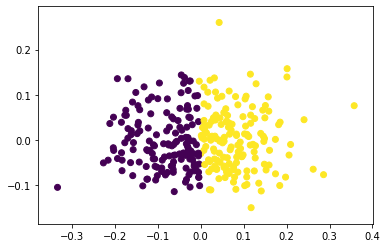

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [68]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

We correctly classified 183 cases, but mis-classified 120 cases.

Let us run the **MiniBatchKmeans**

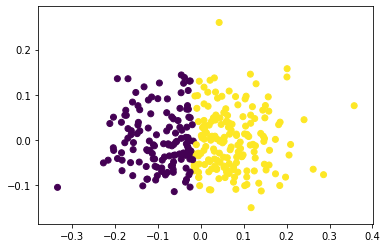

Comparing MiniBatch clusters against the data:
col_0   0    1
row_0         
0      79   53
1      60  111


In [75]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Predict new MiniBatch cluster memberships.
predict_mini = minibatchkmeans.predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict_mini)
plt.show()

# Check the solution against the data.
print('Comparing MiniBatch clusters against the data:')
print(pd.crosstab(predict_mini, y))